In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import iris data
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
#import iris data
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target
names = iris.target_names
print('Class: ',names)
df_iris['target_name'] = np.array([names[0] if v == 0 else names[1] if v == 1 else names[2] if v == 2 else np.nan for v in iris.target])
df_iris

Class:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
#Iris columns
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

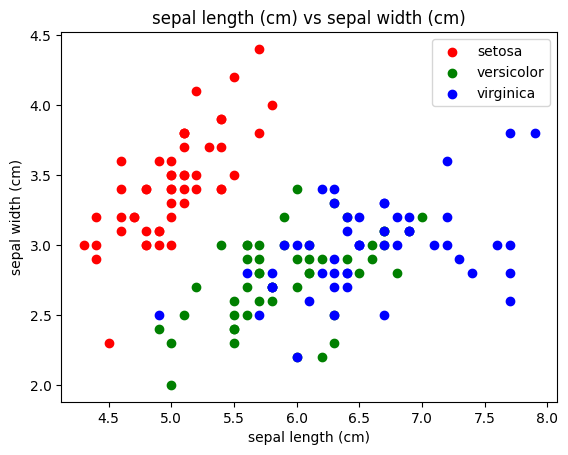

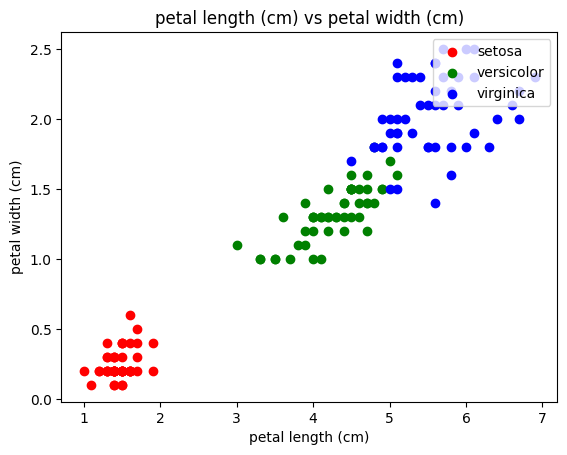

In [5]:
#Data ploting
def PlotingDataset(attribute1,attribute2,df_iris,names):

  group0 = df_iris[df_iris['target']==0]
  group1 = df_iris[df_iris['target']==1]
  group2 = df_iris[df_iris['target']==2]
  
  plt.title(attribute1+' vs '+attribute2)
  plt.xlabel(attribute1)
  plt.ylabel(attribute2)
  plt.scatter(group0[attribute1],group0[attribute2],c='r',label=names[0])
  plt.scatter(group1[attribute1],group1[attribute2],c='g',label=names[1])
  plt.scatter(group2[attribute1],group2[attribute2],c='b',label=names[2])
  plt.legend(loc='upper right')
  plt.show()

PlotingDataset(df_iris.columns[0],df_iris.columns[1],df_iris,names)
# PlotingDataset(df_iris.columns[0],df_iris.columns[2],df_iris,names)
# PlotingDataset(df_iris.columns[0],df_iris.columns[3],df_iris,names)
# PlotingDataset(df_iris.columns[1],df_iris.columns[2],df_iris,names)
# PlotingDataset(df_iris.columns[1],df_iris.columns[3],df_iris,names)
PlotingDataset(df_iris.columns[2],df_iris.columns[3],df_iris,names)

In [6]:
#Data preparation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size = 0.1,random_state = 0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion='entropy',)
model_DecisionTree 

DecisionTreeClassifier(criterion='entropy')

In [8]:
model_DecisionTree.fit(X_train, y_train)
print('Accuracy of trainning set:{:.2f}'.format(model_DecisionTree.score(X_train, y_train)))
print('Accuracy of testing set:{:.2f}'.format(model_DecisionTree.score(X_test, y_test)))

Accuracy of trainning set:1.00
Accuracy of testing set:1.00


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



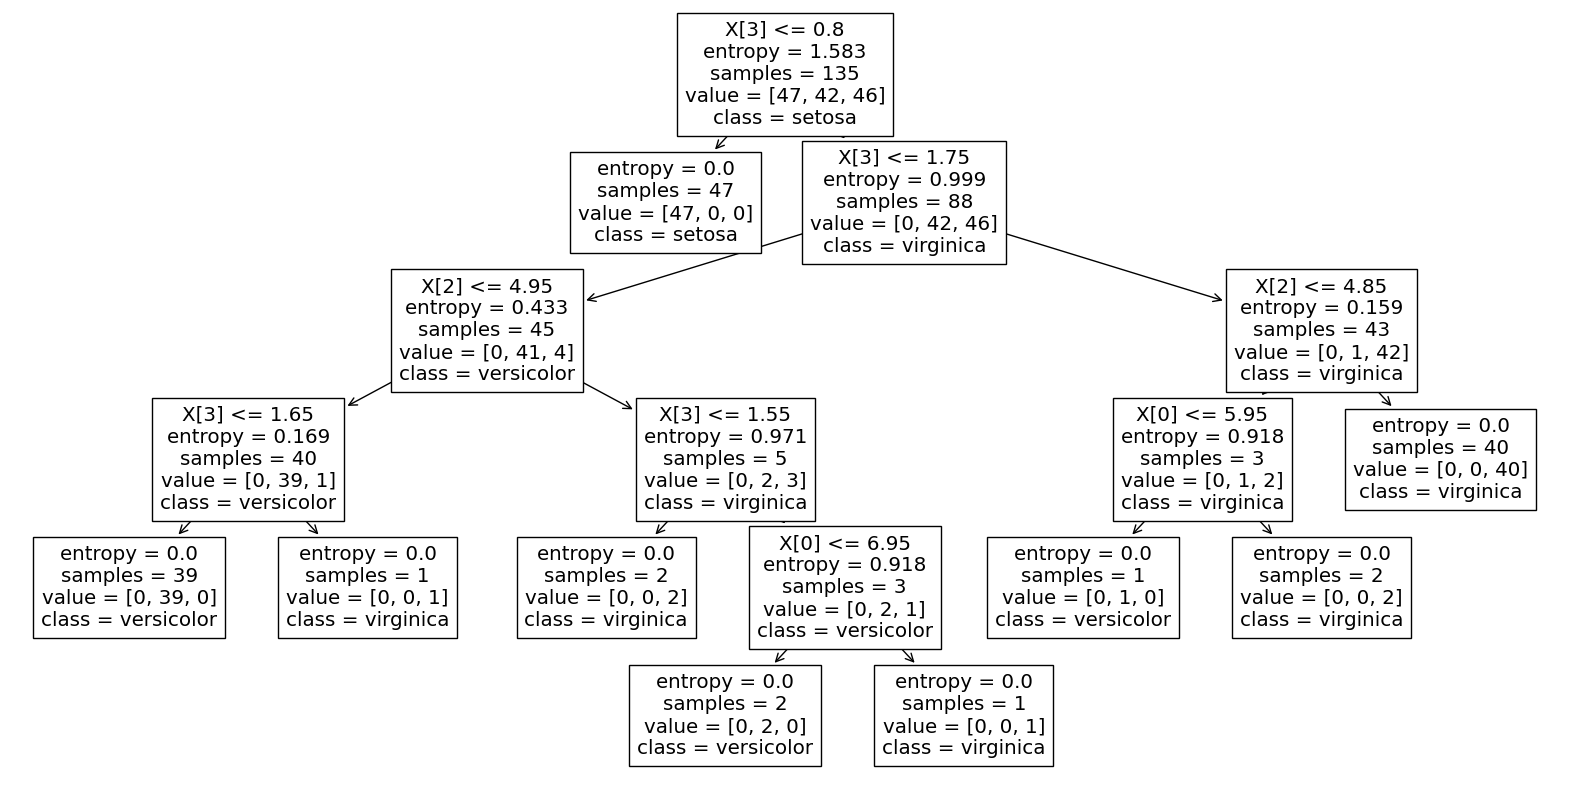

In [9]:
#Vitualization
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

print(export_text(model_DecisionTree,feature_names=iris.feature_names))
plt.figure(figsize=(20,10))
plot_tree(model_DecisionTree,class_names=names)
plt.show()

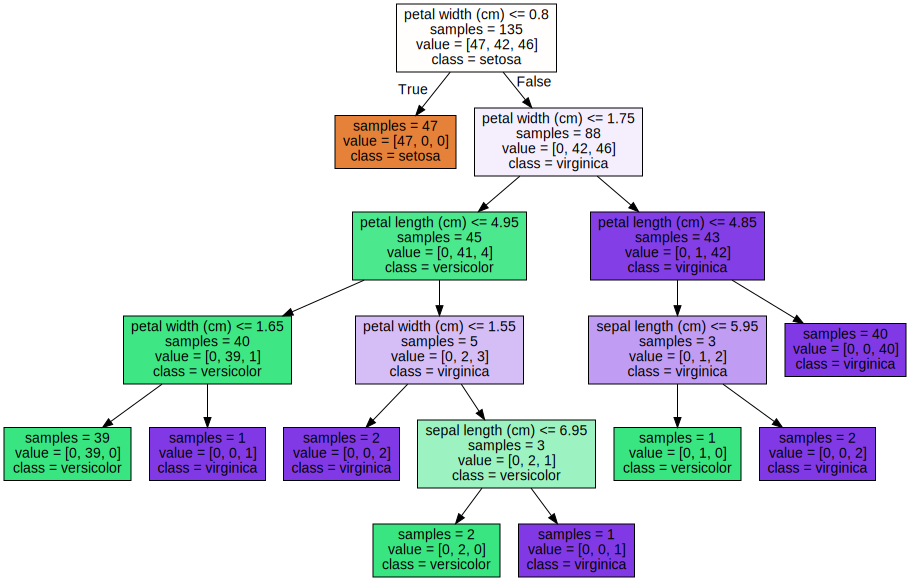

In [10]:
import graphviz
def plot_decision_tree(model_decitionTree, feature_names, class_names):
    export_graphviz(model_DecisionTree, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)
plot_decision_tree(model_DecisionTree, iris.feature_names, iris.target_names)

In [11]:
#Predict on training set
y_pred = model_DecisionTree.predict(X_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        46

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Confusion matrix 
[[47  0  0]
 [ 0 42  0]
 [ 0  0 46]]


<Figure size 640x480 with 0 Axes>

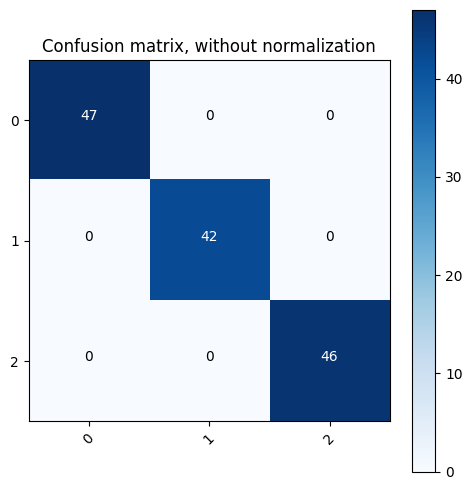

In [12]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
 
  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = 'd' 
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  
  
class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [13]:
#Predict on training set
y_pred = model_DecisionTree.predict(X_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion matrix 
[[3 0 0]
 [0 8 0]
 [0 0 4]]


<Figure size 640x480 with 0 Axes>

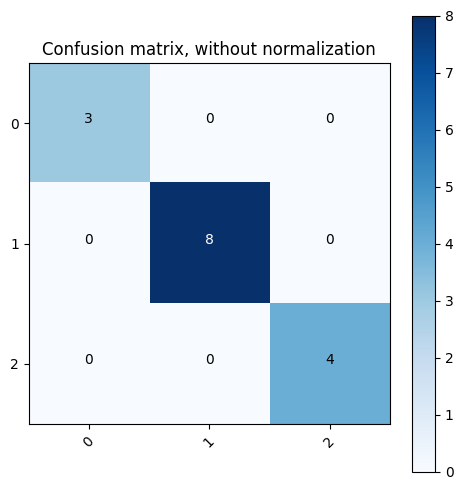

In [14]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')